In [1]:
import pandas_datareader.data as web
import numpy as np
from numpy import nan
from pandas_datareader import data as wb
import datetime
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


In [2]:
MSFT = wb.DataReader('MSFT', data_source='yahoo', start='2019-2-23')
MSFT

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-02-25,112.180000,111.260002,111.760002,111.589996,23750600.0,108.144081
2019-02-26,113.239998,111.169998,111.260002,112.360001,21536700.0,108.890305
2019-02-27,112.360001,110.879997,111.690002,112.169998,21487100.0,108.706169
2019-02-28,112.879997,111.730003,112.040001,112.029999,29083900.0,108.570488
2019-03-01,113.019997,111.669998,112.889999,112.529999,23501200.0,109.055046
...,...,...,...,...,...,...
2022-02-18,293.859985,286.309998,293.049988,287.929993,34223200.0,287.929993
2022-02-22,291.540009,284.500000,285.000000,287.720001,41736100.0,287.720001
2022-02-23,291.700012,280.100006,290.179993,280.269989,37811200.0,280.269989


In [3]:
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-02-25,112.180000,111.260002,111.760002,111.589996,23750600.0,108.144081
2019-02-26,113.239998,111.169998,111.260002,112.360001,21536700.0,108.890305
2019-02-27,112.360001,110.879997,111.690002,112.169998,21487100.0,108.706169
2019-02-28,112.879997,111.730003,112.040001,112.029999,29083900.0,108.570488
2019-03-01,113.019997,111.669998,112.889999,112.529999,23501200.0,109.055046


In [4]:
MSFT.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-18,293.859985,286.309998,293.049988,287.929993,34223200.0,287.929993
2022-02-22,291.540009,284.500000,285.000000,287.720001,41736100.0,287.720001
2022-02-23,291.700012,280.100006,290.179993,280.269989,37811200.0,280.269989
2022-02-24,295.160004,271.519989,272.510010,294.589996,56989700.0,294.589996
2022-02-25,297.630005,291.649994,295.140015,297.309998,32528000.0,297.309998


## Simple rate of return

Rate of return measures the profit or loss of an investment over time. 
Larger is better. 

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

In [5]:
MSFT.fillna(MSFT.mean(), inplace=True)

This is today's price divided by yesterday's price, minus 1. Below, we create a new column called 'simple return'. .shift shifts the index by #.

In [6]:
MSFT['simple_return'] = (MSFT['Adj Close'] / MSFT['Adj Close'].shift(1)) - 1
print (MSFT['simple_return'])

Date
2019-02-25         NaN
2019-02-26    0.006900
2019-02-27   -0.001691
2019-02-28   -0.001248
2019-03-01    0.004463
                ...   
2022-02-18   -0.009631
2022-02-22   -0.000729
2022-02-23   -0.025893
2022-02-24    0.051094
2022-02-25    0.009233
Name: simple_return, Length: 759, dtype: float64


<AxesSubplot:xlabel='Date'>

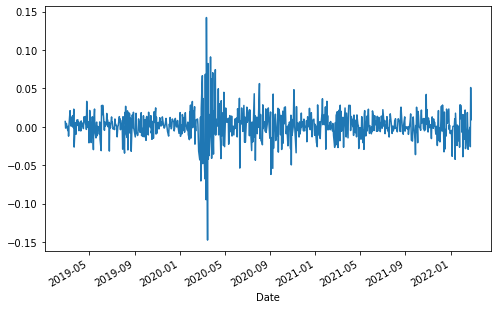

In [7]:
MSFT['simple_return'].plot(figsize=(8,5))

In [8]:
avg_returns_annual = MSFT['simple_return'].mean() * 250
avg_returns_annual

0.3804844833987782

In [9]:
per = avg_returns_annual * 100
f'{per} per cent'

'38.04844833987782 per cent'

In [10]:
tickers = ['MSFT', 'AAPL']
sec_data = pd.DataFrame()
for t in tickers:
    sec_data[t] = wb.DataReader(t, data_source='yahoo', start='2012-1-1')['Adj Close']

sec_data

,MSFT,AAPL
Date,,
2012-01-03,21.623137,12.575915
2012-01-04,22.132010,12.643500
2012-01-05,22.358173,12.783870
2012-01-06,22.705503,12.917509
2012-01-09,22.406639,12.897018
...,...,...
2022-02-18,287.929993,167.300003
2022-02-22,287.720001,164.320007
2022-02-23,280.269989,160.070007


In [11]:
sec_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2555 entries, 2012-01-03 to 2022-02-25
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSFT    2555 non-null   float64
 1   AAPL    2555 non-null   float64
dtypes: float64(2)
memory usage: 59.9 KB


In [12]:
sec_returns = np.log(sec_data / sec_data.shift(1))
sec_returns

,MSFT,AAPL
Date,,
2012-01-03,NaN,NaN
2012-01-04,0.023261,0.005360
2012-01-05,0.010167,0.011041
2012-01-06,0.015415,0.010399
2012-01-09,-0.013250,-0.001588
...,...,...
2022-02-18,-0.009678,-0.009400
2022-02-22,-0.000730,-0.017973
2022-02-23,-0.026234,-0.026205


## Calculate the Portfolio Variance

Equal weightings scheme. 
Lower is lower risk.

In [13]:
weights = np.array([0.5, 0.5])

Portfolio Variance

In [14]:
pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))
pfolio_var

0.05679843063660233

## Calculate the Diversifiable and Non-Diversifiable Risk in a Portfolio

Diversifiable risk is risk that can be reduced through diversification and is unique to a company or industry.
Non-diversifiable risk is risk that is inherent in the market. 


In [15]:
MSFT_var_a = sec_returns['MSFT'].var() * 250
MSFT_var_a

0.06510224710453569

In [16]:
AAPL_var_a = sec_returns['AAPL'].var() * 250
AAPL_var_a

0.08008729342135383

Calculating Diversifiable Risk

In [17]:
dr = pfolio_var - (weights[0] ** 2 * MSFT_var_a) - (weights[1] ** 2 * AAPL_var_a)
dr

0.02050104550512995

In [18]:
print (str(round(dr*100, 3)) + ' %')

2.05 %


Calculating Non-Diversifiable Risk

In [19]:
n_dr_2 = (weights[0] ** 2 * MSFT_var_a) + (weights[1] ** 2 * AAPL_var_a)
n_dr_2

0.036297385131472376

In [20]:
print (str(round(dr*100, 3)) + ' %')

2.05 %


## Calculate the Beta of a Stock

Beta determines the volatility of an asset or portfolio in relation to the overall market, utilizing the S&P 500.
Beta measures the market risk that cannot be avoided with diversification. The riskier the stock, the higher the beta. Less than 1 is less risky; higher than 1 is riskier. 

In [21]:
tickers = ['MSFT', '^GSPC']
data = pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start='2019-2-23', end='2022-02-23')['Adj Close']   

In [22]:
sec_returns = np.log( data / data.shift(1) )

Covariance measures the directional relationship between the returns on two assets. A positive covariance means that asset returns move together while a negative covariance means they move inversely.

Covariance is calculated by analyzing the standard deviations from the expected return or by multiplying the correlation between the two random variables by the standard deviation of each variable.


In [23]:
### Measures MSFT against S&P 500 market
cov = sec_returns.cov() * 250
cov

,MSFT,^GSPC
MSFT,0.093120,0.058777
^GSPC,0.058777,0.051516


In [24]:
cov_with_market = cov.iloc[0,1]
cov_with_market

0.058776666666084665

In [25]:
market_var = sec_returns['^GSPC'].var() * 250
market_var

0.051516355575408575

** Beta **
𝛽𝑝𝑔=𝜎𝑝𝑔,𝑚𝜎2𝑚

Beta measures the market risk that cannot be avoided with diversification.The riskier the stock, the higher the beta. Less than 1 is less risky; higher than 1 is riskier. 

In [26]:
MSFT_beta = cov_with_market / market_var
MSFT_beta

1.1409321565856614

## Calculate the CAPM

CAPM is the risk free rate + the premium. We get the risk free rate from Bloomberg's 10 year rate of return of government bonds. The Yield is 2.5 per cent which we use below, along with the risk premium of 5 per cent.

Traditionally, the risk-free rate of return is the shortest-dated government T-bill.

In [27]:
sec_returns = np.log( data / data.shift(1) )
cov = sec_returns.cov() * 250
cov_with_market = cov.iloc[0,1]
market_var = sec_returns['MSFT'].var() * 250

MSFT_beta = cov_with_market / market_var

Below assumes a risk-free rate of 2.5% and a risk premium of 5% and will estimate the expected return of investment for Microsoft.

In [28]:
MSFT_er = 0.025 + MSFT_beta * 0.05
per = MSFT_er * 100
per

5.655949074182873

## Calculate the Sharpe ratio

The ratio is the average return earned in excess of the risk-free rate per unit of total risk. How the returns are distributed is the disadvantage of the Sharpe ratio. 
Bell curves do not take big moves in the market into account. 
A ratio of 1 or better is good, 2 or better is very good, and 3 or better is excellent. 

In [29]:
Sharpe = (MSFT_er - 0.025) / (sec_returns['MSFT'].std() * 250 ** 0.5)
Sharpe = Sharpe * 100
Sharpe

10.342070676678631

In [30]:
## Build datetime objects

In [31]:
sns.set()
start = datetime.datetime(2019,2,23)
end = datetime.datetime(2022,2,23)

In [32]:
amzn = web.DataReader('AMZN','yahoo',start,end)
amzn['Date'] = amzn.index
print(amzn.tail())


                   High          Low         Open        Close   Volume  \
Date                                                                      
2022-02-16  3176.679932  3094.689941  3115.810059  3162.010010  2635200   
2022-02-17  3206.979980  3090.000000  3162.919922  3093.050049  3201600   
2022-02-18  3109.989990  3017.860107  3109.989990  3052.030029  3168200   
2022-02-22  3059.649902  2969.709961  3009.570068  3003.949951  3306400   
2022-02-23  3035.260010  2893.020020  3033.010010  2896.540039  3212200   

              Adj Close       Date  
Date                                
2022-02-16  3162.010010 2022-02-16  
2022-02-17  3093.050049 2022-02-17  
2022-02-18  3052.030029 2022-02-18  
2022-02-22  3003.949951 2022-02-22  
2022-02-23  2896.540039 2022-02-23  


Saving to a .csv using pandas to csv method.

In [33]:
amzn.to_csv('amzn_data.csv', index=False)

Now we get data for Google and Apple

In [34]:
googl = web.DataReader('GOOGL','yahoo',start,end)
googl['Date'] = googl.index
print(googl.tail())

                   High          Low         Open        Close   Volume  \
Date                                                                      
2022-02-16  2761.719971  2698.479980  2732.929932  2754.760010  1251100   
2022-02-17  2742.270020  2649.570068  2724.860107  2650.780029  1947500   
2022-02-18  2681.399902  2603.929932  2669.340088  2608.060059  2277400   
2022-02-22  2643.610107  2564.469971  2596.760010  2596.270020  2249500   
2022-02-23  2641.020020  2550.550049  2632.969971  2551.760010  1639300   

              Adj Close       Date  
Date                                
2022-02-16  2754.760010 2022-02-16  
2022-02-17  2650.780029 2022-02-17  
2022-02-18  2608.060059 2022-02-18  
2022-02-22  2596.270020 2022-02-22  
2022-02-23  2551.760010 2022-02-23  


In [35]:
googl.to_csv('googl_data.csv', index=False)

In [36]:
aapl = web.DataReader('AAPL','yahoo',start,end)
aapl['Date'] = aapl.index
print(aapl.tail())

                  High         Low        Open       Close      Volume  \
Date                                                                     
2022-02-16  173.339996  170.050003  171.850006  172.550003  61177400.0   
2022-02-17  171.910004  168.470001  171.029999  168.880005  69589300.0   
2022-02-18  170.539993  166.190002  169.820007  167.300003  82614200.0   
2022-02-22  166.690002  162.149994  164.979996  164.320007  91162800.0   
2022-02-23  166.149994  159.750000  165.539993  160.070007  90009200.0   

             Adj Close       Date  
Date                               
2022-02-16  172.550003 2022-02-16  
2022-02-17  168.880005 2022-02-17  
2022-02-18  167.300003 2022-02-18  
2022-02-22  164.320007 2022-02-22  
2022-02-23  160.070007 2022-02-23  


In [37]:
aapl.to_csv('aapl_data.csv', index=False)

Read the 3 files into a pandas dataframe


In [38]:
amzn_df = pd.read_csv('amzn_data.csv')
googl_df = pd.read_csv('googl_data.csv')
aapl_df = pd.read_csv('aapl_data.csv')

Return is defined as the opening price minus the closing price divided by the opening price (R = [open-close]/open). Let’s calculate returns for each ticker. 

In [39]:
amzn_df['Returns'] = (amzn_df['Close'] - amzn_df['Open'])/amzn_df['Open']
amzn_df['Returns']

0     -0.005148
1      0.006408
2      0.007929
3      0.002801
4      0.010029
         ...   
752    0.014828
753   -0.022090
754   -0.018637
755   -0.001867
756   -0.044995
Name: Returns, Length: 757, dtype: float64

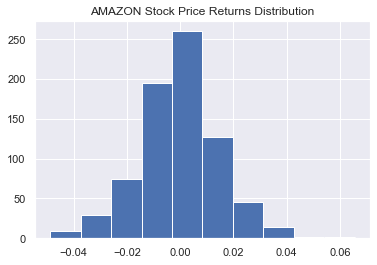

In [40]:
amzn_df['Returns'].hist()
plt.title('AMAZON Stock Price Returns Distribution')
plt.show()

In [41]:
googl_df['Returns'] = (googl_df['Close'] - googl_df['Open'])/googl_df['Open']
googl_df['Returns']


0     -0.004100
1      0.006856
2      0.007971
3      0.006747
4      0.015491
         ...   
752    0.007988
753   -0.027187
754   -0.022957
755   -0.000189
756   -0.030843
Name: Returns, Length: 757, dtype: float64

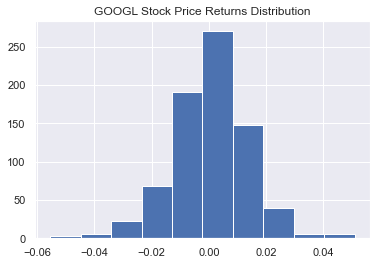

In [42]:
googl_df['Returns'].hist()
plt.title('GOOGL Stock Price Returns Distribution')
plt.show()

In [43]:
aapl_df['Returns'] = (aapl_df['Close'] - aapl_df['Open'])/aapl_df['Open']
aapl_df['Returns']


0      0.000402
1      0.003569
2      0.009584
3     -0.006712
4      0.003959
         ...   
752    0.004073
753   -0.012571
754   -0.014839
755   -0.004000
756   -0.033043
Name: Returns, Length: 757, dtype: float64

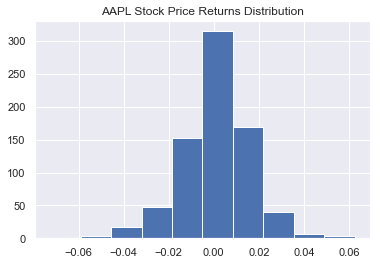

In [44]:
aapl_df['Returns'].hist()
plt.title('AAPL Stock Price Returns Distribution')
plt.show()

Combine the returns for each stock into a single data frame

In [45]:
amzn_df['Ticker'] =  'AMZN'
googl_df['Ticker'] =  'GOOGL'
aapl_df['Ticker'] =  'AAPL'

df = pd.concat([amzn_df, googl_df, aapl_df])
df = df[['Ticker', 'Returns']]

print(df.head())




  Ticker   Returns
0   AMZN -0.005148
1   AMZN  0.006408
2   AMZN  0.007929
3   AMZN  0.002801
4   AMZN  0.010029


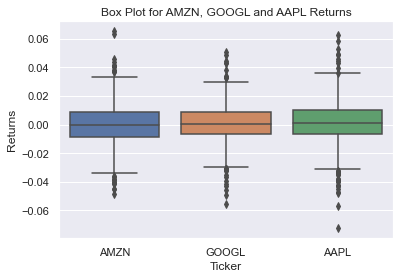

In [46]:
sns.boxplot(x= df['Ticker'], y = df['Returns'])
plt.title('Box Plot for AMZN, GOOGL and AAPL Returns')
plt.show()


       AMZN     GOOGL      AAPL
0 -0.005148 -0.004100  0.000402
1  0.006408  0.006856  0.003569
2  0.007929  0.007971  0.009584
3  0.002801  0.006747 -0.006712
4  0.010029  0.015491  0.003959


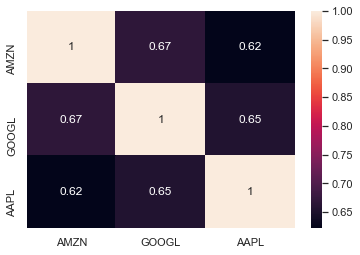

In [47]:
df_corr = pd.DataFrame({'AMZN':amzn_df['Returns'], 'GOOGL':googl_df['Returns'], 'AAPL':aapl_df['Returns']})
print(df_corr.head())
corr = df_corr.corr()
sns.heatmap(corr, annot= True)
plt.show()


This heatmap shows that each of these stocks have a positive linear relationship. When the daily returns of AMZN increase, AAPL and GOOGL are also likely to increase. In a diversified portfolio with stocks that are uncorrelated, one stock price will not necessarily decrease or increase along with any others.

## Calculate the lagging indicators, moving average, and Bollinger Band plots. 

The 10-day moving average for the AMZN adjusted close stock price and consider stock prices after January 23, 2022.

A lagging indicator is an observable or measurable factor that changes sometime after the economic, financial, or business variable with which it is correlated changes. For examples, consider unemployment rate, corporate profits, and labor cost per unit of output. 

Moving average smooths out price data by creating a constantly updated average price. 

A Bollinger Band® is a technical analysis tool defined by a set of trendlines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA) of a security's price. This model utilizes Simple Moving Average and Adjusted Close. 

            High          Low         Open        Close   Volume    Adj Close  \
735  2898.899902  2707.040039  2780.000000  2890.879883  7781200  2890.879883   
736  2872.000000  2762.899902  2844.850098  2799.719971  4541200  2799.719971   
737  2903.699951  2746.370117  2895.000000  2777.449951  4780100  2777.449951   
738  2884.870117  2787.000000  2816.000000  2792.750000  3875800  2792.750000   
739  2879.959961  2758.590088  2817.209961  2879.560059  3719600  2879.560059   

          Date   Returns Ticker  SMA_10  
735 2022-01-24  0.039885   AMZN     NaN  
736 2022-01-25 -0.015864   AMZN     NaN  
737 2022-01-26 -0.040605   AMZN     NaN  
738 2022-01-27 -0.008256   AMZN     NaN  
739 2022-01-28  0.022132   AMZN     NaN  


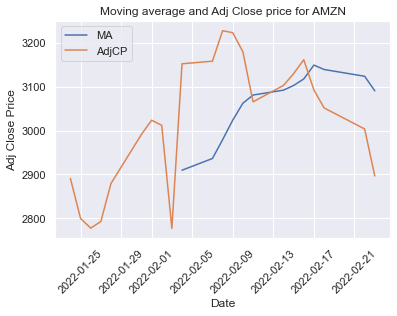

In [49]:
cutoff = datetime.datetime(2022,1,23)
amzn_df['Date'] = pd.to_datetime(amzn_df['Date'], format='%Y/%m/%d')
amzn_df = amzn_df[amzn_df['Date'] > cutoff]
amzn_df['SMA_10'] = amzn_df['Close'].rolling(window=10).mean()
print(amzn_df.head())
plt.plot(amzn_df['Date'], amzn_df['SMA_10'], label="MA")
plt.plot(amzn_df['Date'], amzn_df['Adj Close'], label="AdjCP")
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.title("Moving average and Adj Close price for AMZN")
plt.ylabel('Adj Close Price')
plt.xlabel('Date')
plt.show()


Google and Apple

            High          Low         Open        Close   Volume    Adj Close  \
735  2624.060059  2490.000000  2519.560059  2616.080078  3831100  2616.080078   
736  2587.979980  2530.010010  2574.800049  2538.699951  2348000  2538.699951   
737  2660.000000  2542.840088  2622.379883  2584.659912  2456500  2584.659912   
738  2653.050049  2578.649902  2626.080078  2580.100098  1597500  2580.100098   
739  2667.129883  2569.699951  2593.179932  2667.020020  1718100  2667.020020   

          Date   Returns Ticker  SMA_10  
735 2022-01-24  0.038308  GOOGL     NaN  
736 2022-01-25 -0.014021  GOOGL     NaN  
737 2022-01-26 -0.014384  GOOGL     NaN  
738 2022-01-27 -0.017509  GOOGL     NaN  
739 2022-01-28  0.028475  GOOGL     NaN  


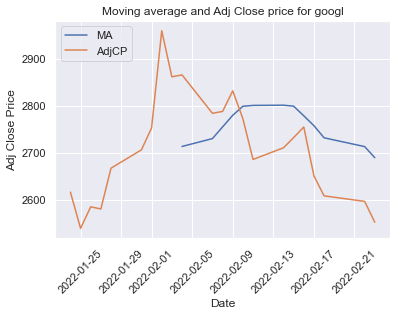

In [50]:
cutoff = datetime.datetime(2022,1,23)
googl_df['Date'] = pd.to_datetime(googl_df['Date'], format='%Y/%m/%d')
googl_df = googl_df[googl_df['Date'] > cutoff]
googl_df['SMA_10'] = googl_df['Close'].rolling(window=10).mean()
print(googl_df.head())
plt.plot(googl_df['Date'], googl_df['SMA_10'], label="MA")
plt.plot(googl_df['Date'], googl_df['Adj Close'], label="AdjCP")
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.title("Moving average and Adj Close price for googl")
plt.ylabel('Adj Close Price')
plt.xlabel('Date')
plt.show()

           High         Low        Open       Close       Volume   Adj Close  \
735  162.300003  154.699997  160.020004  161.619995  162294600.0  161.414337   
736  162.759995  157.020004  158.979996  159.779999  115798400.0  159.576691   
737  164.389999  157.820007  163.500000  159.690002  108275300.0  159.486801   
738  163.839996  158.279999  162.449997  159.220001  121954600.0  159.017410   
739  170.350006  162.800003  165.710007  170.330002  179935700.0  170.113266   

          Date   Returns Ticker  SMA_10  
735 2022-01-24  0.009999   AAPL     NaN  
736 2022-01-25  0.005032   AAPL     NaN  
737 2022-01-26 -0.023303   AAPL     NaN  
738 2022-01-27 -0.019883   AAPL     NaN  
739 2022-01-28  0.027880   AAPL     NaN  


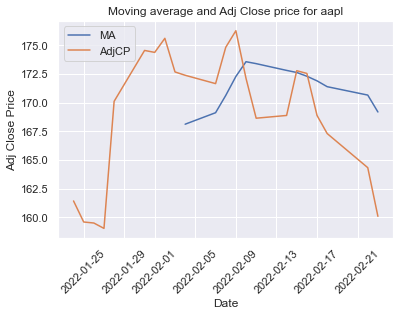

In [51]:
cutoff = datetime.datetime(2022,1,23)
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'], format='%Y/%m/%d')
aapl_df = aapl_df[aapl_df['Date'] > cutoff]
aapl_df['SMA_10'] = aapl_df['Close'].rolling(window=10).mean()
print(aapl_df.head())
plt.plot(aapl_df['Date'], aapl_df['SMA_10'], label="MA")
plt.plot(aapl_df['Date'], aapl_df['Adj Close'], label="AdjCP")
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.title("Moving average and Adj Close price for aapl")
plt.ylabel('Adj Close Price')
plt.xlabel('Date')
plt.show()

The Bollinger Band plot visualizea the dispersion in the moving average. Upper and lower bounds are two standard deviations away from the simple moving average. This takes advantage of fluctuations in price volatilities. 

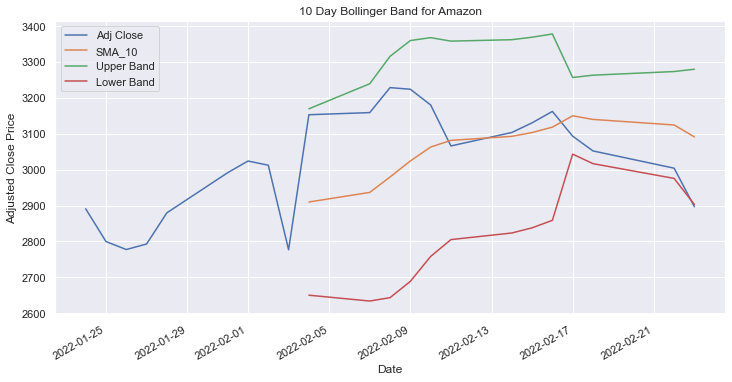

In [52]:
amzn_df['SMA_10_STD'] = amzn_df['Adj Close'].rolling(window=10).std() 
amzn_df['Upper Band'] = amzn_df['SMA_10'] + (amzn_df['SMA_10_STD'] * 2)
amzn_df['Lower Band'] = amzn_df['SMA_10'] - (amzn_df['SMA_10_STD'] * 2)
amzn_df.index = amzn_df['Date']
amzn_df[['Adj Close', 'SMA_10', 'Upper Band', 'Lower Band']].plot(figsize=(12,6))
plt.title('10 Day Bollinger Band for Amazon')
plt.ylabel('Adjusted Close Price')
plt.show()


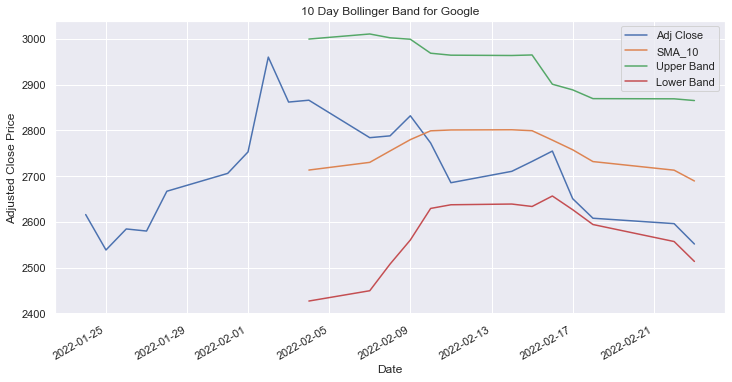

In [53]:
googl_df['SMA_10_STD'] = googl_df['Adj Close'].rolling(window=10).std() 
googl_df['Upper Band'] = googl_df['SMA_10'] + (googl_df['SMA_10_STD'] * 2)
googl_df['Lower Band'] = googl_df['SMA_10'] - (googl_df['SMA_10_STD'] * 2)
googl_df.index = googl_df['Date']
googl_df[['Adj Close', 'SMA_10', 'Upper Band', 'Lower Band']].plot(figsize=(12,6))
plt.title('10 Day Bollinger Band for Google')
plt.ylabel('Adjusted Close Price')
plt.show()


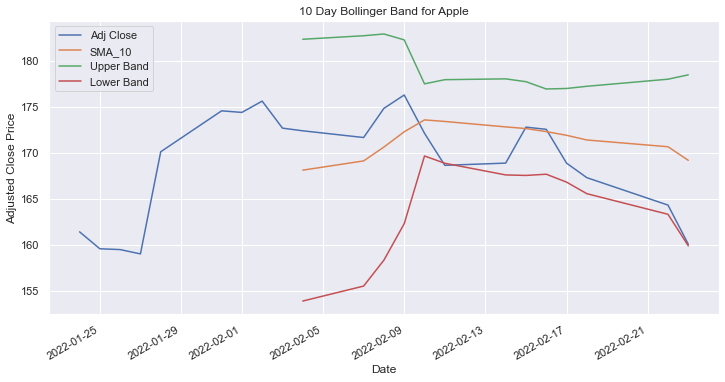

In [54]:
aapl_df['SMA_10_STD'] = aapl_df['Adj Close'].rolling(window=10).std() 
aapl_df['Upper Band'] = aapl_df['SMA_10'] + (aapl_df['SMA_10_STD'] * 2)
aapl_df['Lower Band'] = aapl_df['SMA_10'] - (aapl_df['SMA_10_STD'] * 2)
aapl_df.index = aapl_df['Date']
aapl_df[['Adj Close', 'SMA_10', 'Upper Band', 'Lower Band']].plot(figsize=(12,6))
plt.title('10 Day Bollinger Band for Apple')
plt.ylabel('Adjusted Close Price')
plt.show()
